<a href="https://colab.research.google.com/github/Kavya2099/mlbookcamp/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2022-09-19 03:07:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.008s  

2022-09-19 03:07:46 (162 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house= pd.read_csv(data)
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


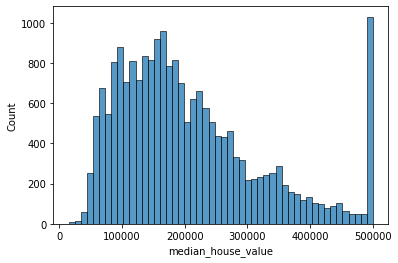

In [ ]:
sns.histplot(house.median_house_value,bins=50)

In [ ]:
features=['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

h=house[features]

Question 1
Find a feature with missing values. How many missing values does it have?

In [ ]:
h.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

total_bedrooms has 207 missing values


question 2
What's the median (50% percentile) for variable 'population'?

In [ ]:
h.population.median()

1166.0

Question 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



X= h
y= house.median_house_value







filling with 0 in missing columns

In [ ]:
X= X.fillna(0)

train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 42)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.25,random_state = 42)


forest_model= RandomForestRegressor(random_state=2)
forest_model.fit(train_X, train_y)
preds= forest_model.predict(val_X)


print(mean_absolute_error(val_y, preds))
val_y_1= np.log1p(val_y)
preds_1= np.log1p(preds)
print(np.round(mean_squared_error(val_y_1, preds_1,squared=False),2))


33444.75289244186
0.24


refilling missing values with mean

In [ ]:
X=h
mean= h.mean()
X= X.fillna(mean)


train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 42)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.25,random_state = 42)


forest_model= RandomForestRegressor(random_state=2)
forest_model.fit(train_X, train_y)
preds= forest_model.predict(val_X)


print(mean_absolute_error(val_y, preds))
val_y_1= np.log1p(val_y)
preds_1= np.log1p(preds)
print(np.round(mean_squared_error(val_y_1, preds_1,squared=False),2))

33379.686644864334
0.24


both shows same rse

Question 5


In [ ]:
X= X.fillna(0)

def seed(s):

  train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2,random_state = s)

# Use the same function above for the validation set
  train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.25,random_state = s)


  forest_model= RandomForestRegressor(random_state=2)
  forest_model.fit(train_X, train_y)
  preds= forest_model.predict(val_X)


  print(mean_absolute_error(val_y, preds))
  val_y_1= np.log1p(val_y)
  preds_1= np.log1p(preds)
  mse= mean_squared_error(val_y_1, preds_1,squared=False)
  print(mse)
  return mse



s=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
avg=[]

for i in s:
  mse= seed(i)
  avg.append(mse)

avg1= np.std(avg)
print(round(avg1,3))



33299.663408430235
0.24390082856527134
32334.754408914727
0.2448348659779187
33072.84269379845
0.24136254022645431
32258.668389050392
0.23177516730953052
32814.285210755814
0.23608882709980306
32878.12113129845
0.2392698622992992
33232.5033502907
0.24005725726184976
32704.895162306206
0.24088439809119533
32919.26653100776
0.24408329723792155
33134.17563226744
0.23988354003632426
0.004


std we got is 0.004 ; nearest answer is 0.005

Question 6

from the last qeuestion we got the seed 9 value. so we'll use the same here


1.   33134.17563226744  --> mae
2.   0.23988354003632426 ---> mse



the nearest answer to this is 0.245